In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/thyroid-disease-prediction/dataset thyroid'):
    for filename in filenames:
        print(os.path.join(dirname, filename))      

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thyroid-disease-prediction/dataset thyroid/Benign/tiroides207.jpg
/kaggle/input/thyroid-disease-prediction/dataset thyroid/Benign/tiroides31 (68).jpg
/kaggle/input/thyroid-disease-prediction/dataset thyroid/Benign/tiroides31 (22).jpg
/kaggle/input/thyroid-disease-prediction/dataset thyroid/Benign/tiroides31 (97).jpg
/kaggle/input/thyroid-disease-prediction/dataset thyroid/Benign/tiroides48.jpg
/kaggle/input/thyroid-disease-prediction/dataset thyroid/Benign/tiroides277.jpg
/kaggle/input/thyroid-disease-prediction/dataset thyroid/Benign/3_14 - Copy.jpg
/kaggle/input/thyroid-disease-prediction/dataset thyroid/Benign/3_7.jpg
/kaggle/input/thyroid-disease-prediction/dataset thyroid/Benign/tiroides58.jpg
/kaggle/input/thyroid-disease-prediction/dataset thyroid/Benign/tiroides279.jpg
/kaggle/input/thyroid-disease-prediction/dataset thyroid/Benign/tiroides31 (103).jpg
/kaggle/input/thyroid-disease-prediction/dataset thyroid/Benign/tiroides117.jpg
/kaggle/input/thyroid-disease-pre

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Constants
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 50
CHANNELS = 3
CLASS_NAMES = ['Benign', 'normal thyroid', 'Malignant']

Found 1937 files belonging to 3 classes.


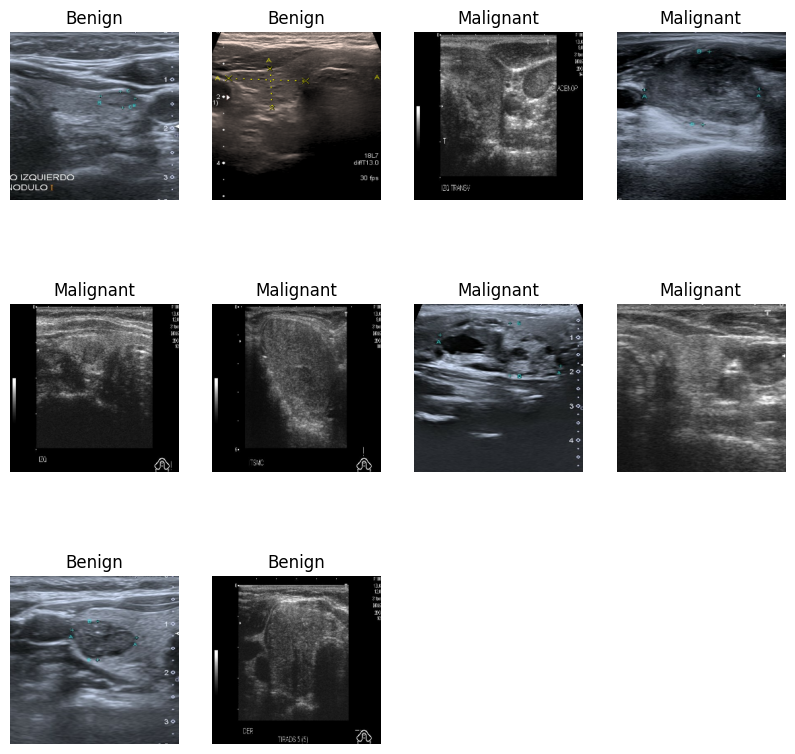

In [4]:
# Load dataset
data_set = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/thyroid-disease-prediction/dataset thyroid",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_names=CLASS_NAMES,
    label_mode='int'
)

# Display sample images
plt.figure(figsize=(10, 10))
for image_batch, label_batch in data_set.take(1):
    for i in range(10):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(CLASS_NAMES[label_batch[i]])
        plt.axis("off")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

image_paths = []
labels = []
dataset_dir = "/kaggle/input/thyroid-disease-prediction/dataset thyroid"
# Loop through each class folder
for label in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, label)
    
    # Check if the class_dir is actually a directory
    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            if img_file.endswith('.jpg') or img_file.endswith('.png'):  # Add other extensions if necessary
                image_paths.append(os.path.join(class_dir, img_file))
                labels.append(label)

# Create the DataFrame
df_shuffled = pd.DataFrame({'image': image_paths, 'label': labels})

#Shuffling the data
df = df_shuffled.sample(frac=1, random_state=42).reset_index(drop=True)

# Filter the data for the specified class names
df_filtered = df[df['label'].isin(CLASS_NAMES)]

# Split the filtered data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_filtered['image'], df_filtered['label'], test_size=0.25, random_state=42)

# Create dataframes for the training and test data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

Epoch 1/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 207ms/step - accuracy: 0.4732 - loss: 0.9964 - val_accuracy: 0.5199 - val_loss: 0.9408
Epoch 2/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.4716 - loss: 0.9592 - val_accuracy: 0.5746 - val_loss: 0.8924
Epoch 3/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.5249 - loss: 0.9127 - val_accuracy: 0.5821 - val_loss: 0.8869
Epoch 4/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.5020 - loss: 0.9142 - val_accuracy: 0.5871 - val_loss: 0.8892
Epoch 5/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.5082 - loss: 0.9228 - val_accuracy: 0.6119 - val_loss: 0.8694
Epoch 6/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.5475 - loss: 0.8953 - val_accuracy: 0.5796 - val_loss: 0.8678
Epoch 7/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.5413 - loss: 0.8820 - val_accuracy: 0.5547 - val_loss: 0.8569
Epoch 8/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.5589 - loss: 0.8707 - val_accuracy: 0

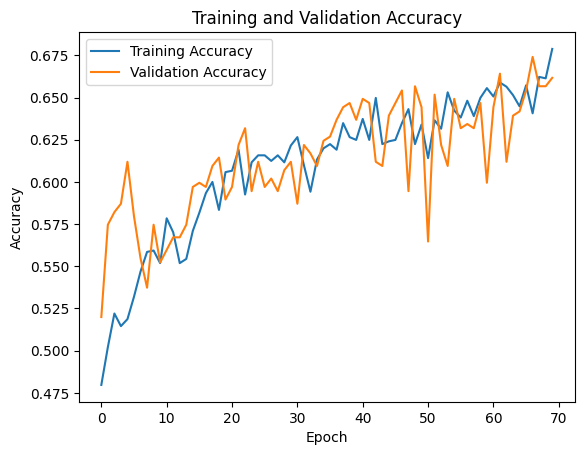

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# Define the CBAM module
class CBAM(layers.Layer):
    def __init__(self, reduction_ratio=8):
        super(CBAM, self).__init__()
        self.reduction_ratio = reduction_ratio

    def build(self, input_shape):
        self.channel_attention = Sequential([
            layers.GlobalAveragePooling2D(),
            layers.Dense(input_shape[-1] // self.reduction_ratio, activation='relu'),
            layers.Dense(input_shape[-1], activation='sigmoid')
        ])

        self.spatial_attention = Sequential([
            layers.Conv2D(1, (7, 7), padding='same', activation='sigmoid')
        ])

    def call(self, inputs):
        # Channel Attention
        channel_attention = self.channel_attention(inputs)
        channel_attention = layers.Reshape((1, 1, inputs.shape[-1]))(channel_attention)
        x = layers.Multiply()([inputs, channel_attention])

        # Spatial Attention
        spatial_attention = self.spatial_attention(x)
        x = layers.Multiply()([x, spatial_attention])

        return x

# Build the CNN model with CBAM
def build_model(input_shape=(50, 50, 3)):
    inputs = layers.Input(shape=input_shape)

    # Initial convolutional layers
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    # Add CBAM block
    x = CBAM()(x)

    # More convolutional layers
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Flatten and fully connected layers
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)

    # Output layer
    outputs = layers.Dense(3, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Initialize and compile the model
model = build_model(input_shape=(50, 50, 3))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=70, validation_data=test_generator)

# Get training, validation, and test accuracy
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print accuracies
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.4331 - loss: 1.0083 - val_accuracy: 0.5174 - val_loss: 0.9334
Epoch 2/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.4955 - loss: 0.9435 - val_accuracy: 0.5174 - val_loss: 0.9393
Epoch 3/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.4649 - loss: 0.9610 - val_accuracy: 0.5224 - val_loss: 0.9122
Epoch 4/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.4912 - loss: 0.9311 - val_accuracy: 0.5697 - val_loss: 0.9072
Epoch 5/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.4848 - loss: 0.9290 - val_accuracy: 0.5622 - val_loss: 0.8988
Epoch 6/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.5085 - loss: 0.9084 - val_accuracy: 0.5622 - val_loss: 0.8877
Epoch 7/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.4904 - loss: 0.9384 - val_accuracy: 0.5572 - val_loss: 0.8920
Epoch 8/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.5234 - loss: 0.9011 - val_accuracy: 0

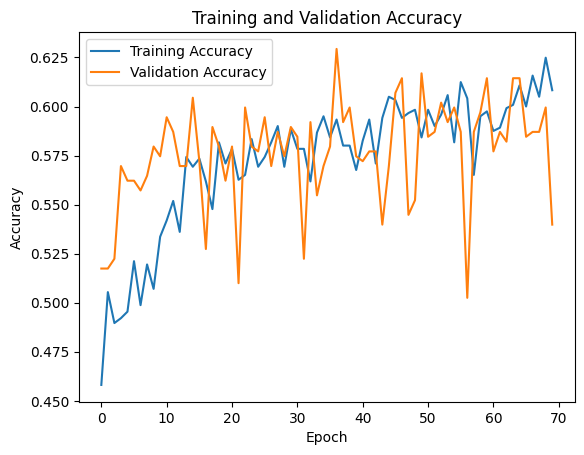

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CBAM module
class CBAM(layers.Layer):
    def __init__(self, reduction_ratio=8):
        super(CBAM, self).__init__()
        self.reduction_ratio = reduction_ratio

    def build(self, input_shape):
        # Channel Attention: Apply across the feature dimension
        self.channel_attention = Sequential([
            layers.GlobalAveragePooling1D(),
            layers.Dense(input_shape[-1] // self.reduction_ratio, activation='relu'),
            layers.Dense(input_shape[-1], activation='sigmoid')
        ])

        # Spatial Attention: Apply across the timesteps (axis=1)
        self.spatial_attention = Sequential([
            layers.Conv1D(1, 7, padding='same', activation='sigmoid')
        ])

    def call(self, inputs):
        # Channel Attention: Operates on features (channels)
        channel_attention = self.channel_attention(inputs)
        channel_attention = layers.Reshape((1, inputs.shape[-1]))(channel_attention)
        x = layers.Multiply()([inputs, channel_attention])

        # Spatial Attention: Operates on timesteps (sequence dimension)
        spatial_attention = self.spatial_attention(x)
        x = layers.Multiply()([x, spatial_attention])

        return x

# Build the model with LSTM and CBAM
def build_model(input_shape=(50, 50, 3)):
    inputs = layers.Input(shape=input_shape)

    # Reshape the input to be compatible with LSTM
    x = layers.Reshape((input_shape[0], input_shape[1] * input_shape[2]))(inputs)  # (50, 150)

    # LSTM Layers
    x = layers.LSTM(64, return_sequences=True)(x)  # return_sequences=True to keep the time dimension
    x = layers.LSTM(64, return_sequences=True)(x)

    # Add CBAM block
    x = CBAM()(x)  # Apply CBAM on the output of LSTM

    # Fully connected layers
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)

    # Output layer
    outputs = layers.Dense(3, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Initialize and compile the model
model = build_model(input_shape=(50, 50, 3))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (assuming you have your data generators ready)
history = model.fit(train_generator, epochs=70, validation_data=test_generator)

# Get training, validation, and test accuracy
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print accuracies
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**FINAL**# 

Found 1205 validated image filenames belonging to 3 classes.
Found 402 validated image filenames belonging to 3 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.4623 - loss: 0.9980 - val_accuracy: 0.5672 - val_loss: 0.9374
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.4938 - loss: 0.9628 - val_accuracy: 0.5647 - val_loss: 0.8888
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.5019 - loss: 0.9282 - val_accuracy: 0.5522 - val_loss: 0.8797
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.5120 - loss: 0.9112 - val_accuracy: 0.5672 - val_loss: 0.8585
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.5157 - loss: 0.8910 - val_accuracy: 0.6219 - val_loss: 0.8318
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.5593 - loss: 0.8614 - val_accuracy: 0.5746 - val_loss: 0.8806
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.5807 - loss: 0.8584 - val_accuracy: 0.5672 - val_loss: 0.8366
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.5636 - loss: 0.8652 - val_accuracy: 0.544

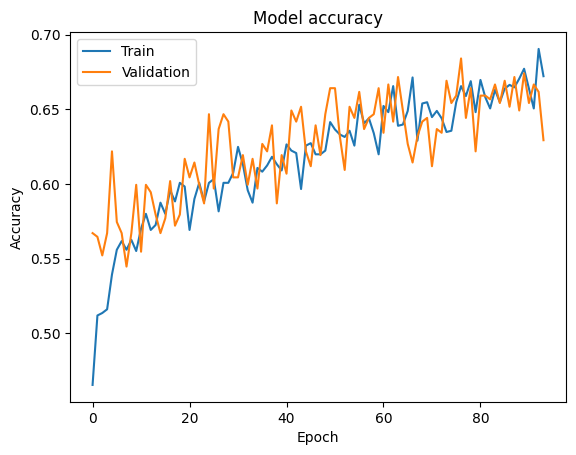

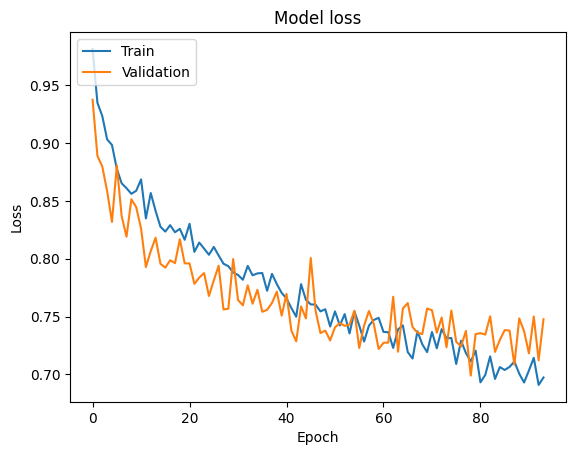

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the Channel Attention Module
class ChannelAttention(layers.Layer):
    def __init__(self, reduction_ratio=8):
        super(ChannelAttention, self).__init__()
        self.reduction_ratio = reduction_ratio
    
    def build(self, input_shape):
        self.channel = input_shape[-1]
        self.avg_pool = layers.GlobalAveragePooling2D()
        self.max_pool = layers.GlobalMaxPooling2D()
        self.fc1 = layers.Dense(self.channel // self.reduction_ratio, activation='relu', use_bias=False)
        self.fc2 = layers.Dense(self.channel, activation='sigmoid', use_bias=False)
        
    def call(self, inputs):
        avg_out = self.fc2(self.fc1(self.avg_pool(inputs)))
        max_out = self.fc2(self.fc1(self.max_pool(inputs)))
        out = avg_out + max_out
        return inputs * out[:, tf.newaxis, tf.newaxis, :]

# Define the Spatial Attention Module
class SpatialAttention(layers.Layer):
    def __init__(self):
        super(SpatialAttention, self).__init__()
    
    def build(self, input_shape):
        self.conv = layers.Conv2D(1, (7, 7), padding='same', activation='sigmoid')
    
    def call(self, inputs):
        avg_out = tf.reduce_mean(inputs, axis=-1, keepdims=True)
        max_out = tf.reduce_max(inputs, axis=-1, keepdims=True)
        concat = tf.concat([avg_out, max_out], axis=-1)
        out = self.conv(concat)
        return inputs * out

# Define the CBAM Block that integrates both channel and spatial attention
class CBAM(layers.Layer):
    def __init__(self, reduction_ratio=8):
        super(CBAM, self).__init__()
        self.channel_attention = ChannelAttention(reduction_ratio)
        self.spatial_attention = SpatialAttention()

    def call(self, inputs):
        x = self.channel_attention(inputs)
        x = self.spatial_attention(x)
        return x

# Set the image size and batch size
image_size = (50, 50)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create generators for the training and test data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

train_generator.class_indices = {class_name: i for i, class_name in enumerate(CLASS_NAMES)}
test_generator.class_indices = {class_name: i for i, class_name in enumerate(CLASS_NAMES)}

# Build the model
model = models.Sequential()

# Add convolutional layers (example, you might already have them)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Add CBAM Block
model.add(CBAM())

# Add more Conv2D layers or CBAM blocks here if needed
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Add dropout for regularization
model.add(layers.Dropout(0.5))

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# Add a Dense layer after flattening
model.add(layers.Dense(128, activation='relu'))

# Output layer with softmax activation
model.add(layers.Dense(len(CLASS_NAMES), activation='softmax'))

# Learning rate schedule
initial_lr = 0.001
lr_schedule = ExponentialDecay(initial_lr, decay_steps=100000, decay_rate=0.96, staircase=True)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Early stopping callback with increased patience
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Print training and validation accuracy after training
train_accuracy = history.history['accuracy'][-1] * 100
val_accuracy = history.history['val_accuracy'][-1] * 100

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Validation Accuracy: {val_accuracy:.2f}%")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
